# Problem 2

eigenvalue: [0.01761319 0.02388339 0.02783528]
eigenvecter: [[-0.30933198  0.94069151  0.13933128]
 [ 0.46520554  0.02190334  0.88493167]
 [-0.82939589 -0.33855535  0.4443903 ]]
[-0.04105289  0.0617396  -0.11007301] [ 0.14537683  0.003385   -0.0523212 ] [0.0232459  0.14764119 0.07414167]


C:\Users\ruji-\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


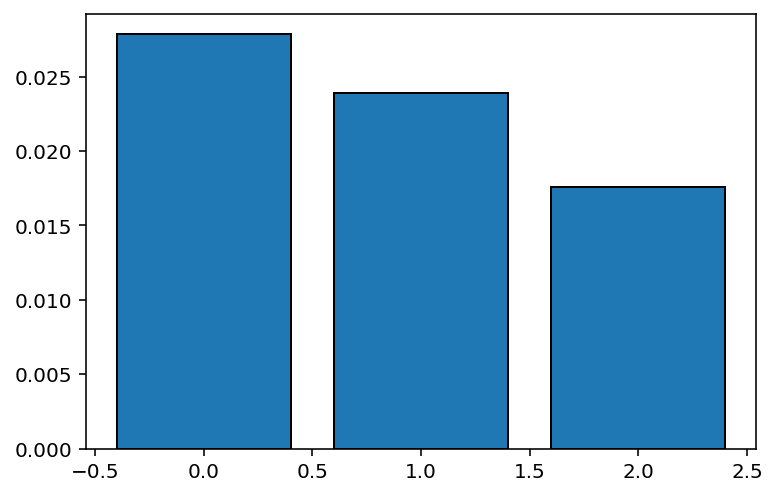

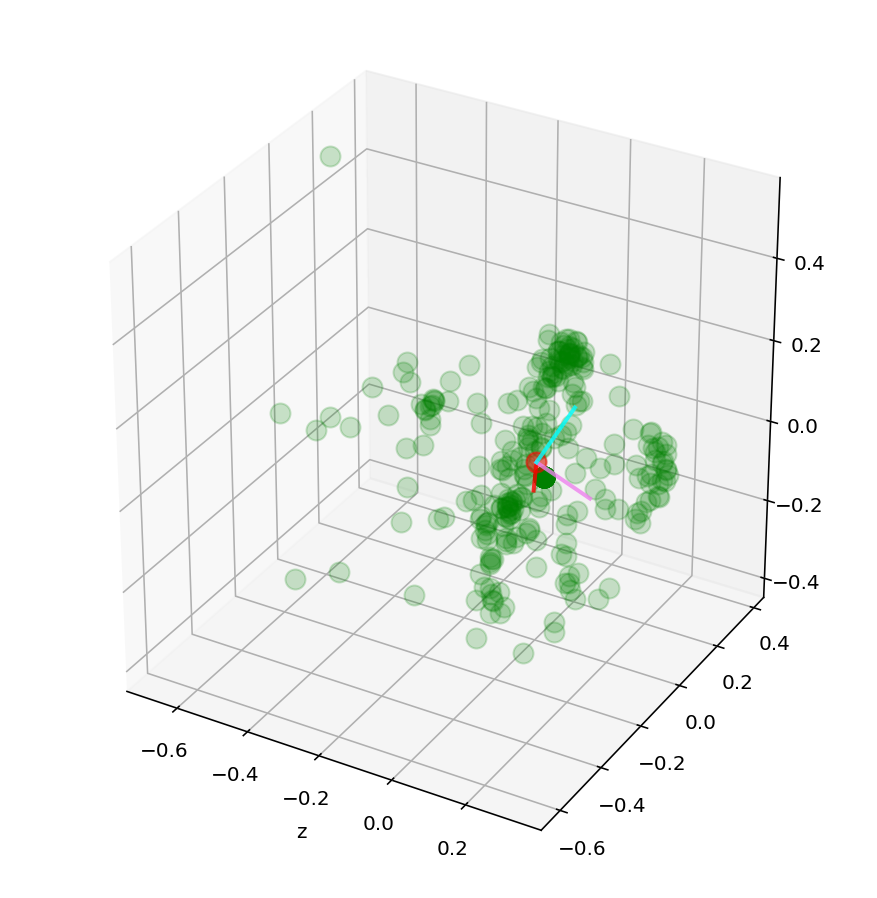

eigenvalue: [0.01761319 0.02388339 0.02783528]
eigenvecter: [[-0.30933198  0.94069151  0.13933128]
 [ 0.46520554  0.02190334  0.88493167]
 [-0.82939589 -0.33855535  0.4443903 ]]


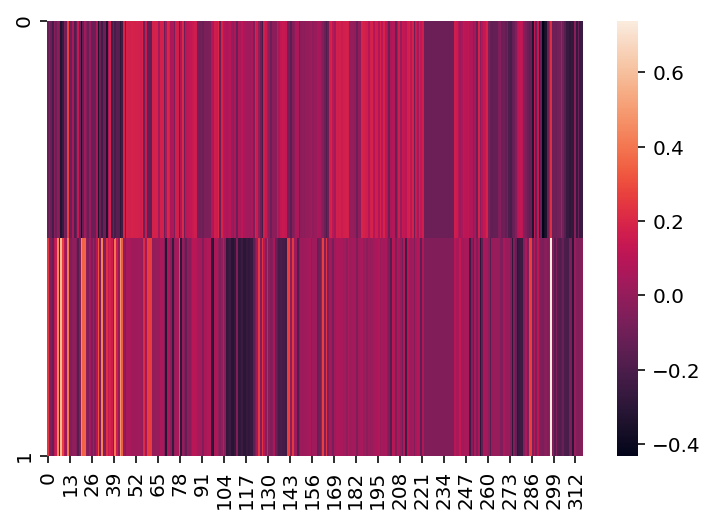

In [2]:
# problem 2
df = problem_2[['accelerateX', 'accelerateY', 'accelerateZ']]

df.describe()

# ปรับให้เป็น zero mean 
for column in df.columns :
    df[column] = df.apply(lambda row: (row[column] - df[column].mean()), axis=1)
df

# คำนวณค่า covariance matrix ของชุดข้อมูล df
covariance_matrix = np.dot(df.T, df) / (len(df) -1)
covariance_matrix

### 2.2 eigenvalue and eigenvecter

# คำนวณค่า eigenvalue / eigenvector จาก covariance matrix 
eigenvalue, eigenvecter = np.linalg.eig(covariance_matrix)
print('eigenvalue:', eigenvalue)
print('eigenvecter:', eigenvecter)

###  2.3 Graph

# แสดงกราฟแท่ง (Bar graph) ของค่า Eigenvalue ที่จัดเรียงค่าจากมากไปน้อย
plt.bar(np.arange(3), height=np.sort(eigenvalue)[::-1], width=0.8, align='center', edgecolor='k')

# แสดงปรับขนาดของ Eigenvector ด้วยค่า Eigenvalue
ev1 = eigenvecter[: ,0] * np.sqrt(eigenvalue[0])
ev2 = eigenvecter[: ,1] * np.sqrt(eigenvalue[1])
ev3 = eigenvecter[: ,2] * np.sqrt(eigenvalue[2])
print(ev1, ev2, ev3)

# แสดงกราฟความสัมพันธ์ของ feature และ eigen vector
fig = plt.figure(figsize=(35, 8))

ax = fig.add_subplot(141, projection='3d')
ax.plot(df['accelerateX'], df['accelerateY'], df['accelerateZ'], 'o', markersize=10, color='green', alpha=0.2)
ax.plot([df['accelerateX'].mean()], [df['accelerateY'].mean()], [df['accelerateZ'].mean()], 'o', markersize=10, color='red', alpha=0.5)

ax.plot([0, ev1[0]], [0, ev1[1]], [0, ev1[2]], color='red', alpha=0.8, lw=2)
ax.plot([0, ev2[0]], [0, ev2[1]], [0, ev2[2]], color='violet', alpha=0.8, lw=2)
ax.plot([0, ev3[0]], [0, ev3[1]], [0, ev3[2]], color='cyan', alpha=0.8, lw=2)

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')

ax.view_init(30, -60)

plt.show()

### 2.4 PCA

print('eigenvalue:', eigenvalue)
print('eigenvecter:', eigenvecter)

# ลดมิติของข้อมูลจาก 3D features 𝑥 (accelerateX, accelerateY, accelerateZ) ลงเหลือ 2D โดยเลือก eigenvector 2 vector แรกที่มีค่าสูงสุด
x_pca = np.dot(np.take(eigenvecter,np.argsort(eigenvalue)[1:].tolist(),axis=0), df.T)
df_x_pca = pd.DataFrame(x_pca)
df_x_pca

# แสดงภาพ df_x_pca ด้วย heatmap
sns.heatmap(df_x_pca)

### 2.1 covariance_matrix